<a href="https://colab.research.google.com/github/RodriguesL1/DatathonFiap/blob/main/socioeconomico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import folium as fl
import plotly.express as px

In [153]:
df=pd.read_excel('/content/PSE2020_domicílios.xlsx')

In [154]:
df.head()

,cod_domicilio,ano,total_moradores,entrevistador,nucleo_pm,latitude,longitude,cond_comicilio,conjugue_sexo_dif,conjugue_mesmo_sex,...,tipo_combutivel_cozinhar,tipo_moradia,qtd_moradoes_celular,telefone_fixo,geladeira,televisão,computador,internet,internet_celular,automovel
0,2020A1000,2020,4,Jéssica,Centro,-23827784122665600,-4681072108548340,Pessoa responsável pelo domicílio,1,0,...,Gás de botijão,Alugado,3,Não,Sim,"Sim, somente de tela fina (LED, LCD ou plasma)",Não,Sim,Sim,Sim
1,2020A1001,2020,4,Jéssica,Centro,-23827784122665600,-4681072108548340,Pessoa responsável pelo domicílio,1,0,...,Gás de botijão,Próprio de algum morador - já pago,4,Não,Sim,"Sim, somente de tela fina (LED, LCD ou plasma)",Sim,Sim,Sim,Não
2,2020A1002,2020,3,Jéssica,Centro,-23827784122665600,-4681072108548340,Pessoa responsável pelo domicílio,0,0,...,Gás de botijão,Próprio de algum morador - já pago,2,Sim,Sim,"Sim, somente de tela fina (LED, LCD ou plasma)",Sim,Sim,Sim,Sim
3,2020B1016,2020,2,Adriana Jansen,Centro,-23827784122665600,-4681072108548340,Pessoa responsável pelo domicílio,0,0,...,Gás de botijão,Próprio de algum morador - ainda pagando,1,Não,Sim,"Sim, somente de tela fina (LED, LCD ou plasma)",Não,Não,Sim,Sim
4,2020B3000,2020,5,Adriana Jansen,Filipinho,-2381819071831590,-4682962148596910,Pessoa responsável pelo domicílio,1,0,...,Gás de botijão,Próprio de algum morador - já pago,3,Sim,Sim,"Sim, somente de tela fina (LED, LCD ou plasma)",Não,Sim,Sim,Sim


In [155]:
df.columns

Index(['cod_domicilio', 'ano', 'total_moradores', 'entrevistador', 'nucleo_pm',
       'latitude', 'longitude', 'cond_comicilio', 'conjugue_sexo_dif',
       'conjugue_mesmo_sex', 'total_filhos', 'conjugue_domicilio',
       'filhos_domicilio', 'arranjo_familiar', 'genero', 'total_homem',
       'total_mulher', 'idade', 'cor', 'relacao_com_aluno', 'total_aluno_pm',
       'total_bolsista', 'total_bolsista_decisao', 'total_bolsista_joao_paulo',
       'total_bolsista_einstein', 'total_bolsista_fiap',
       'total_bolsista_unisa', 'total_bolsista_estacio',
       'total_bolsista_outros', 'total_inativos', 'total_pit',
       'total_populacao_ocupada', 'total_populacao_desoculpada',
       'total_trab_infantil', 'total_fft', 'total_forca_trab',
       'total_desempregados', 'total_trab_formal', 'total_trab_informal',
       'privacao_trab_formal', 'toal_reda_trab', 'total_ind_bpc_loas',
       'total_valor_bpc_loas', 'total_bolsa_familia',
       'total_valor_bolsa_familia', 'total_indi_

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 82 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cod_domicilio                 654 non-null    object 
 1   ano                           654 non-null    int64  
 2   total_moradores               654 non-null    int64  
 3   entrevistador                 654 non-null    object 
 4   nucleo_pm                     654 non-null    object 
 5   latitude                      654 non-null    int64  
 6   longitude                     654 non-null    int64  
 7   cond_comicilio                654 non-null    object 
 8   conjugue_sexo_dif             654 non-null    int64  
 9   conjugue_mesmo_sex            654 non-null    int64  
 10  total_filhos                  654 non-null    int64  
 11  conjugue_domicilio            654 non-null    object 
 12  filhos_domicilio              654 non-null    object 
 13  arran

#Sobre os polos da PM

In [157]:
polos_pm = df.nucleo_pm.unique()
polos_pm

array(['Centro', 'Filipinho', 'Granjinha', 'Cipó'], dtype=object)

In [158]:
len(polos_pm)

4

In [159]:
polo_centro = df[df['nucleo_pm'] == polos_pm[0]]
polo_filipinho = df[df['nucleo_pm'] == polos_pm[1]]
polo_granjinha = df[df['nucleo_pm'] == polos_pm[2]]
polo_cipo = df[df['nucleo_pm'] == polos_pm[3]]

In [160]:
total_centro = polo_centro.nucleo_pm.count()
total_filipinho = polo_filipinho.nucleo_pm.count()
total_granjinha = polo_granjinha.nucleo_pm.count()
total_cipo = polo_cipo.nucleo_pm.count()

In [161]:
total_por_polo = [total_centro, total_filipinho, total_granjinha, total_cipo]

In [162]:
df_polos = pd.DataFrame({'polos':polos_pm, 'total_por_polo':total_por_polo})
df_polos

,polos,total_por_polo
0,Centro,288
1,Filipinho,180
2,Granjinha,67
3,Cipó,119


In [163]:
cores = [ '#FF5931', '#FBBA00' ,'#FFD401',  '#FF2E34','#FF8427','#257CBB', '#145089' ]

<ipython-input-164-38805f3bb5e1>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-164-38805f3bb5e1>:1: UserWarning:

The palette list has more values (7) than needed (4), which may not be intended.



(0.0, 1000.0)

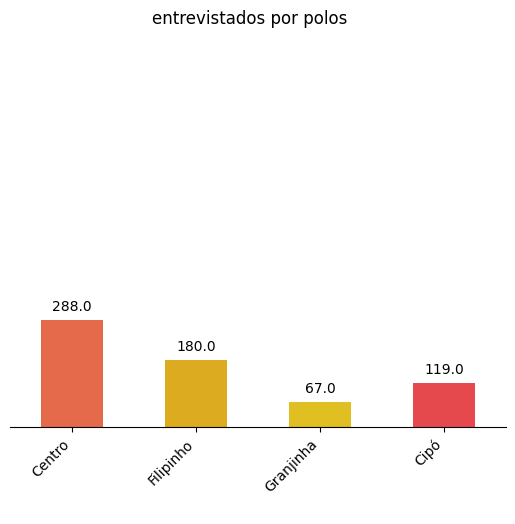

In [164]:
ax = sns.barplot(data=df_polos,  x='polos', y='total_por_polo', palette=cores ,  width=0.50, hue=None)

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

sns.despine(ax=ax, left=True, right=True, top=True, bottom=False)
ax.get_yaxis().set_visible(False)

plt.suptitle("entrevistados por polos", fontsize=12)
plt.xlabel(' ')
plt.ylabel(' ')
plt.xticks(rotation=45, ha='right')
plt.grid(False)
plt.ylim(0,1000)

In [165]:
df_2 = df.drop(df[['longitude', 'latitude', 'conjugue_sexo_dif']], axis=1)

In [166]:
df_2


,cod_domicilio,ano,total_moradores,entrevistador,nucleo_pm,cond_comicilio,conjugue_mesmo_sex,total_filhos,conjugue_domicilio,filhos_domicilio,...,tipo_combutivel_cozinhar,tipo_moradia,qtd_moradoes_celular,telefone_fixo,geladeira,televisão,computador,internet,internet_celular,automovel
0,2020A1000,2020,4,Jéssica,Centro,Pessoa responsável pelo domicílio,0,2,Com Cônjuge,Com filhos,...,Gás de botijão,Alugado,3,Não,Sim,"Sim, somente de tela fina (LED, LCD ou plasma)",Não,Sim,Sim,Sim
1,2020A1001,2020,4,Jéssica,Centro,Pessoa responsável pelo domicílio,0,1,Com Cônjuge,Com filhos,...,Gás de botijão,Próprio de algum morador - já pago,4,Não,Sim,"Sim, somente de tela fina (LED, LCD ou plasma)",Sim,Sim,Sim,Não
2,2020A1002,2020,3,Jéssica,Centro,Pessoa responsável pelo domicílio,0,2,Sem Cônjuge,Com filhos,...,Gás de botijão,Próprio de algum morador - já pago,2,Sim,Sim,"Sim, somente de tela fina (LED, LCD ou plasma)",Sim,Sim,Sim,Sim
3,2020B1016,2020,2,Adriana Jansen,Centro,Pessoa responsável pelo domicílio,0,1,Sem Cônjuge,Com filhos,...,Gás de botijão,Próprio de algum morador - ainda pagando,1,Não,Sim,"Sim, somente de tela fina (LED, LCD ou plasma)",Não,Não,Sim,Sim
4,2020B3000,2020,5,Adriana Jansen,Filipinho,Pessoa responsável pelo domicílio,0,3,Com Cônjuge,Com filhos,...,Gás de botijão,Próprio de algum morador - já pago,3,Sim,Sim,"Sim, somente de tela fina (LED, LCD ou plasma)",Não,Sim,Sim,Sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,2020M3055,2020,5,Simone,Filipinho,Pessoa responsável pelo domicílio,0,3,Com Cônjuge,Com filhos,...,Gás de botijão,Próprio de algum morador - já pago,3,Não,Sim,"Sim, somente de tela fina (LED, LCD ou plasma)",Não,Sim,Não,Sim
650,2020M3059,2020,4,Simone,Filipinho,Pessoa responsável pelo domicílio,0,2,Com Cônjuge,Com filhos,...,Gás de botijão,Próprio de algum morador - já pago,3,Não,Sim,"Sim, somente de tela fina (LED, LCD ou plasma)",Sim,Sim,Sim,Sim
651,2020M3060,2020,4,Simone,Filipinho,Pessoa responsável pelo domicílio,0,2,Com Cônjuge,Com filhos,...,Gás de botijão,Cedido por familiar,2,Não,Sim,"Sim, somente de tela fina (LED, LCD ou plasma)",Não,Não,Não,Não
652,2020M3065,2020,4,Simone,Filipinho,Pessoa responsável pelo domicílio,0,2,Sem Cônjuge,Com filhos,...,Gás de botijão,Próprio de algum morador - ainda pagando,1,Não,Sim,"Sim, de tela fina e de tubo",Não,Não,Sim,Não


In [167]:
centro = [-23.828442880482246, -46.81034577842625]
granjinha = [-23.854413528332127, -46.80526974975671]
filipinho =[-23.81815638692386, -46.8297287711652]
cipo = [-23.871272784615634, -46.79111311964649]

In [168]:
mapa = fl.Map(centro, zoom_start=13)

In [169]:
def map (loc, tool, pop):
  fl.Marker(
      location=loc,
      tooltip=tool,
      popup=pop,
      icon=fl.Icon(color='orange'),
  ).add_to(mapa)

In [170]:
map(centro, "Unidade do Centro", "Embu-Guaçu-SP")
map(granjinha, "Unidade Granjinha", "Embu-Guaçu-SP")
map(filipinho, "Unidade Filipinho", "Embu-Guaçu-SP")
map(cipo, "Unidade Cipó", "Embu-Guaçu-SP")

In [171]:
mapa

#VAMOS VER

In [172]:
df_2.head()

,cod_domicilio,ano,total_moradores,entrevistador,nucleo_pm,cond_comicilio,conjugue_mesmo_sex,total_filhos,conjugue_domicilio,filhos_domicilio,...,tipo_combutivel_cozinhar,tipo_moradia,qtd_moradoes_celular,telefone_fixo,geladeira,televisão,computador,internet,internet_celular,automovel
0,2020A1000,2020,4,Jéssica,Centro,Pessoa responsável pelo domicílio,0,2,Com Cônjuge,Com filhos,...,Gás de botijão,Alugado,3,Não,Sim,"Sim, somente de tela fina (LED, LCD ou plasma)",Não,Sim,Sim,Sim
1,2020A1001,2020,4,Jéssica,Centro,Pessoa responsável pelo domicílio,0,1,Com Cônjuge,Com filhos,...,Gás de botijão,Próprio de algum morador - já pago,4,Não,Sim,"Sim, somente de tela fina (LED, LCD ou plasma)",Sim,Sim,Sim,Não
2,2020A1002,2020,3,Jéssica,Centro,Pessoa responsável pelo domicílio,0,2,Sem Cônjuge,Com filhos,...,Gás de botijão,Próprio de algum morador - já pago,2,Sim,Sim,"Sim, somente de tela fina (LED, LCD ou plasma)",Sim,Sim,Sim,Sim
3,2020B1016,2020,2,Adriana Jansen,Centro,Pessoa responsável pelo domicílio,0,1,Sem Cônjuge,Com filhos,...,Gás de botijão,Próprio de algum morador - ainda pagando,1,Não,Sim,"Sim, somente de tela fina (LED, LCD ou plasma)",Não,Não,Sim,Sim
4,2020B3000,2020,5,Adriana Jansen,Filipinho,Pessoa responsável pelo domicílio,0,3,Com Cônjuge,Com filhos,...,Gás de botijão,Próprio de algum morador - já pago,3,Sim,Sim,"Sim, somente de tela fina (LED, LCD ou plasma)",Não,Sim,Sim,Sim


In [173]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 79 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cod_domicilio                 654 non-null    object 
 1   ano                           654 non-null    int64  
 2   total_moradores               654 non-null    int64  
 3   entrevistador                 654 non-null    object 
 4   nucleo_pm                     654 non-null    object 
 5   cond_comicilio                654 non-null    object 
 6   conjugue_mesmo_sex            654 non-null    int64  
 7   total_filhos                  654 non-null    int64  
 8   conjugue_domicilio            654 non-null    object 
 9   filhos_domicilio              654 non-null    object 
 10  arranjo_familiar              654 non-null    object 
 11  genero                        654 non-null    object 
 12  total_homem                   654 non-null    int64  
 13  total

In [174]:
dados_trab_informal= df_2.total_trab_informal.unique()
dados_trab_informal

array([2, 1, 0, 3, 4])

In [175]:
trab_inf_2 = df[df['total_trab_informal'] == dados_trab_informal[0]]
trab_inf_1 = df[df['total_trab_informal'] == dados_trab_informal[1]]
trab_inf_0 = df[df['total_trab_informal'] == dados_trab_informal[2]]
trab_inf_3 = df[df['total_trab_informal'] == dados_trab_informal[3]]
trab_inf_4 = df[df['total_trab_informal'] == dados_trab_informal[4]]

In [176]:
trab_inf_2

,cod_domicilio,ano,total_moradores,entrevistador,nucleo_pm,latitude,longitude,cond_comicilio,conjugue_sexo_dif,conjugue_mesmo_sex,...,tipo_combutivel_cozinhar,tipo_moradia,qtd_moradoes_celular,telefone_fixo,geladeira,televisão,computador,internet,internet_celular,automovel
0,2020A1000,2020,4,Jéssica,Centro,-23827784122665600,-4681072108548340,Pessoa responsável pelo domicílio,1,0,...,Gás de botijão,Alugado,3,Não,Sim,"Sim, somente de tela fina (LED, LCD ou plasma)",Não,Sim,Sim,Sim
11,2020B4006,2020,4,Adriana Jansen,Granjinha,-23856214266063900,-4680456009084830,Pessoa responsável pelo domicílio,1,0,...,Gás de botijão,Próprio de algum morador - já pago,4,Sim,Sim,"Sim, somente de tela fina (LED, LCD ou plasma)",Sim,Sim,Sim,Não
12,2020B4008,2020,5,Adriana Jansen,Granjinha,-23856214266063900,-4680456009084830,Pessoa responsável pelo domicílio,1,0,...,Gás de botijão,Próprio de algum morador - já pago,3,Sim,Sim,"Sim, somente de tela fina (LED, LCD ou plasma)",Não,Sim,Sim,Sim
18,2020B4014,2020,4,Adriana Jansen,Granjinha,-23856214266063900,-4680456009084830,Pessoa responsável pelo domicílio,1,0,...,Gás de botijão,Próprio de algum morador - já pago,3,Não,Sim,"Sim, somente de tubo",Não,Sim,Não,Sim
19,2020B4015,2020,3,Adriana Jansen,Granjinha,-23856214266063900,-4680456009084830,Pessoa responsável pelo domicílio,1,0,...,Gás de botijão,Alugado,2,Não,Sim,"Sim, somente de tela fina (LED, LCD ou plasma)",Não,Sim,Não,Sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,2020M1061,2020,4,Simone,Centro,-23827784122665600,-4681072108548340,Pessoa responsável pelo domicílio,1,0,...,Gás de botijão,Alugado,2,Não,Sim,"Sim, somente de tela fina (LED, LCD ou plasma)",Não,Sim,Não,Sim
623,2020M1062,2020,3,Simone,Centro,-23827784122665600,-4681072108548340,Pessoa responsável pelo domicílio,1,0,...,Gás de botijão,Cedido por familiar,3,Sim,Sim,"Sim, somente de tela fina (LED, LCD ou plasma)",Sim,Sim,Não,Sim
630,2020M2033,2020,5,Simone,Cipó,-23876312892700800,-4679360412802350,Pessoa responsável pelo domicílio,0,0,...,Gás de botijão,Próprio de algum morador - já pago,4,Sim,Sim,"Sim, somente de tubo",Não,Sim,Sim,Não
631,2020M2034,2020,5,Simone,Cipó,-23876312892700800,-4679360412802350,Pessoa responsável pelo domicílio,1,0,...,Gás de botijão,Alugado,3,Não,Sim,"Sim, somente de tela fina (LED, LCD ou plasma)",Não,Sim,Não,Sim


In [177]:
total_trab_inf_2 = trab_inf_2.total_trab_informal.count()
total_trab_inf_1 = trab_inf_1.total_trab_informal.count()
total_trab_inf_0 = trab_inf_0.total_trab_informal.count()
total_trab_inf_3 = trab_inf_3.total_trab_informal.count()
total_trab_inf_4 = trab_inf_4.total_trab_informal.count()


In [178]:
total_trab_inf_2 = trab_inf_2.nucleo_pm.count()

In [179]:
total_trab_inf = [total_trab_inf_2, total_trab_inf_1, total_trab_inf_0, total_trab_inf_3,total_trab_inf_4]


In [180]:
total_trab_inf

[84, 272, 286, 10, 2]

In [181]:
df_trab_inf = pd.DataFrame({'trabalho informal':dados_trab_informal, 'total_trab_inf':total_trab_inf})
df_trab_inf

,trabalho informal,total_trab_inf
0,2,84
1,1,272
2,0,286
3,3,10
4,4,2


In [182]:
def graf (data, x, y, subtitle, xlabel, ylabel):
  ax = sns.barplot(data=data,  x=x, y=y, palette=cores ,  width=0.50, hue=None)

  for p in ax.patches:
      ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

  sns.despine(ax=ax, left=True, right=True, top=True, bottom=False)
  ax.get_yaxis().set_visible(False)

  plt.suptitle(subtitle, fontsize=12)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.xticks(rotation=45, ha='right')
  plt.grid(False)
  plt.ylim(0,1000)
  plt.show()

<ipython-input-182-ffc1fa5ebd52>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-182-ffc1fa5ebd52>:2: UserWarning:

The palette list has more values (7) than needed (5), which may not be intended.



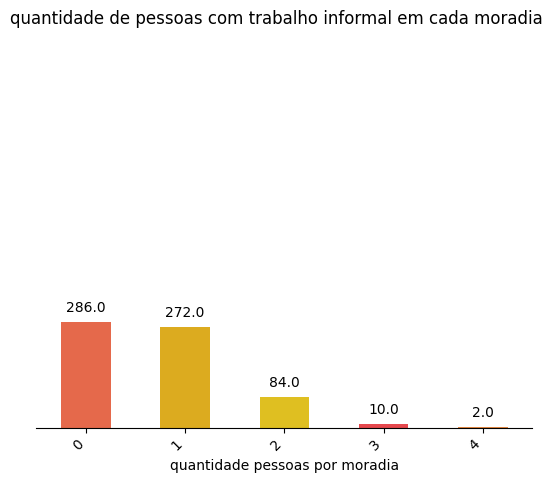

In [183]:
graf(df_trab_inf, 'trabalho informal', 'total_trab_inf', 'quantidade de pessoas com trabalho informal em cada moradia', 'quantidade pessoas por moradia', 'quantidade de pessoas com trabalho informal' )

In [189]:
def plotar_qdt_coluna(df, coluna, subtitle, xlabel, ylabel):

    array_coluna = df[coluna].unique()
    total_por_coluna = []


    for colu in array_coluna:
        total = df[df[coluna] == colu][coluna].count()
        total_por_coluna.append(total)

    df_coluna = pd.DataFrame({coluna: array_coluna, 'total_por_coluna': total_por_coluna})
    cores = ['#FF5931', '#FBBA00', '#FFD401', '#FF2E34', '#FF8427', '#257CBB', '#145089']


    ax = sns.barplot(data=df_coluna, x=coluna, y='total_por_coluna', palette=cores, width=0.50, hue=None)

    for p in ax.patches:
        ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')


    sns.despine(ax=ax, left=True, right=True, top=True, bottom=False)
    ax.get_yaxis().set_visible(False)
    plt.suptitle(subtitle, fontsize=12)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45, ha='right')
    plt.grid(False)
    plt.ylim(0, 1000)
    plt.show()


    fig = px.bar(df_coluna, x=coluna, y='total_por_coluna', title=subtitle,
             color='total_por_coluna', color_continuous_scale=px.colors.sequential.Viridis)
    fig.update_layout(xaxis_title=xlabel,
                      yaxis_title='Total por Coluna',
                      xaxis_tickangle=-45)
    fig.show()





In [185]:
print("Lembre-se de substituir 'df', 'coluna', 'subtitle', 'xlabel', e 'ylabel' com valores reais quando for chamar a função.")

Lembre-se de substituir 'df', 'coluna', 'subtitle', 'xlabel', e 'ylabel' com valores reais quando for chamar a função.


<ipython-input-189-5054f2c1be22>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-189-5054f2c1be22>:15: UserWarning:

The palette list has more values (7) than needed (4), which may not be intended.



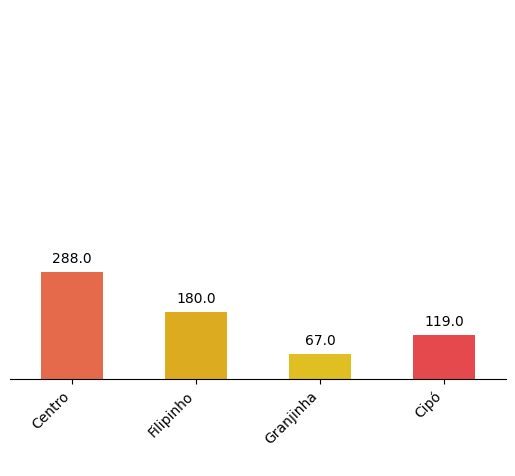

In [190]:
 plotar_qdt_coluna(df, 'nucleo_pm', '', ' ','')

<ipython-input-184-f0b7b3254da1>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-184-f0b7b3254da1>:15: UserWarning:

The palette list has more values (7) than needed (5), which may not be intended.



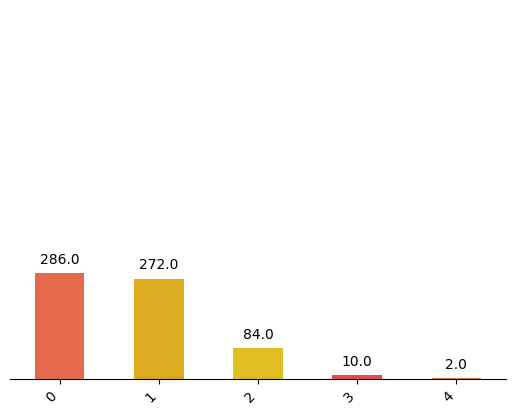

In [187]:
plotar_qdt_coluna(df_2,'total_trab_informal', '','','')

<ipython-input-184-f0b7b3254da1>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-184-f0b7b3254da1>:15: UserWarning:


The palette list has fewer values (7) than needed (11) and will cycle, which may produce an uninterpretable plot.



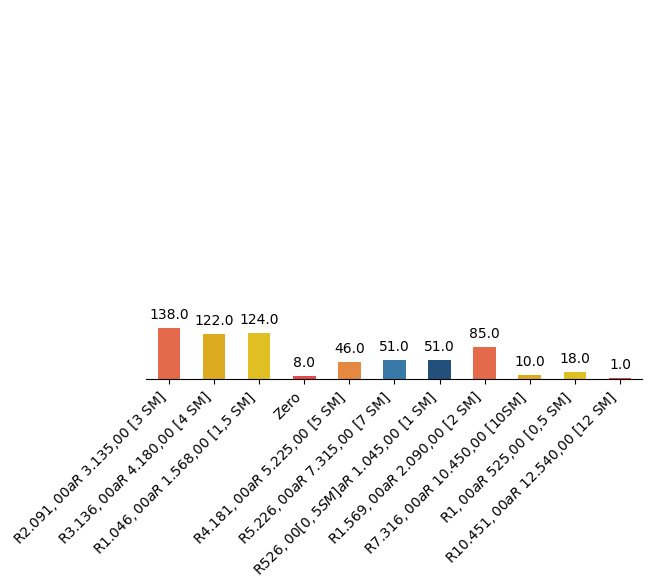

In [188]:
plotar_qdt_coluna(df_2,'faixa_total_renda', '','','')